In [4]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    hinge_loss, roc_auc_score
)

RANDOM_STATE = 42

In [5]:
df = pd.read_csv("SVMs_dataset.csv")
assert df.shape[0] == 400, f"Expected 400 rows, found {df.shape[0]}"
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = df[["Age", "Salary"]].values
y = df["Purchased"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class balance (train):", np.bincount(y_train))
print("Class balance (test):", np.bincount(y_test))


Train shape: (300, 2)  Test shape: (100, 2)
Class balance (train): [193 107]
Class balance (test): [64 36]


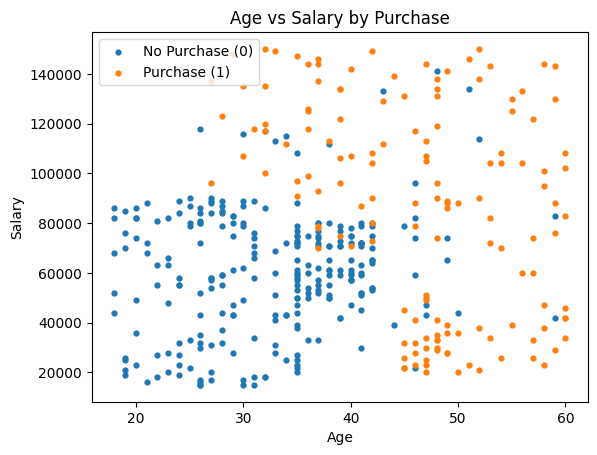

In [7]:
plt.figure()
mask0 = (y == 0)
mask1 = (y == 1)
plt.scatter(X[mask0, 0], X[mask0, 1], label="No Purchase (0)", s=12)
plt.scatter(X[mask1, 0], X[mask1, 1], label="Purchase (1)", s=12)
plt.xlabel("Age"); plt.ylabel("Salary"); plt.legend()
plt.title("Age vs Salary by Purchase")
plt.show()


In [8]:
def plot_decision_regions(model, X, y, scaler=None, title="Decision Regions"):
    # Mesh grid over feature space
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1000.0, X[:, 1].max() + 1000.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler is not None:
        grid = scaler.transform(grid)
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[y==0, 0], X[y==0, 1], s=12, label="No Purchase (0)")
    plt.scatter(X[y==1, 0], X[y==1, 1], s=12, label="Purchase (1)")
    plt.xlabel("Age"); plt.ylabel("Salary"); plt.legend()
    plt.title(title)
    plt.show()


In [9]:
rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=RANDOM_STATE))
])
rbf_svm.fit(X_train, y_train)

y_pred_a = rbf_svm.predict(X_test)
proba_a = rbf_svm.predict_proba(X_test)[:, 1]
dec_a   = rbf_svm.decision_function(X_test)

acc_a = accuracy_score(y_test, y_pred_a)
cm_a  = confusion_matrix(y_test, y_pred_a)
rep_a = classification_report(y_test, y_pred_a, digits=3)
hl_a  = hinge_loss(y_test, dec_a)
auc_a = roc_auc_score(y_test, proba_a)

print("Model A (RBF SVM)")
print("Accuracy:", round(acc_a, 4))
print("Hinge Loss:", round(hl_a, 4))
print("ROC-AUC:", round(auc_a, 4))
print("\nConfusion Matrix:\n", cm_a)
print("\nClassification Report:\n", rep_a)


Model A (RBF SVM)
Accuracy: 0.91
Hinge Loss: 0.2143
ROC-AUC: 0.9423

Confusion Matrix:
 [[59  5]
 [ 4 32]]

Classification Report:
               precision    recall  f1-score   support

           0      0.937     0.922     0.929        64
           1      0.865     0.889     0.877        36

    accuracy                          0.910       100
   macro avg      0.901     0.905     0.903       100
weighted avg      0.911     0.910     0.910       100



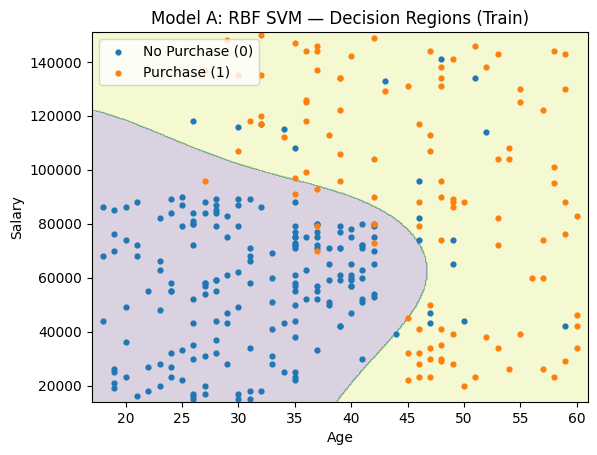

In [10]:

plot_decision_regions(rbf_svm, X_train, y_train, scaler=None, title="Model A: RBF SVM — Decision Regions (Train)")


In [11]:
Pipeline: `StandardScaler` → `SGDClassifier(loss="hinge")`.

SyntaxError: invalid character '→' (U+2192) (341342797.py, line 1)